In [1]:
import numpy as np
import matplotlib.pyplot as plt

from wave import WavePDESolver

100%|██████████| 1300/1300 [00:00<00:00, 5529.54it/s]


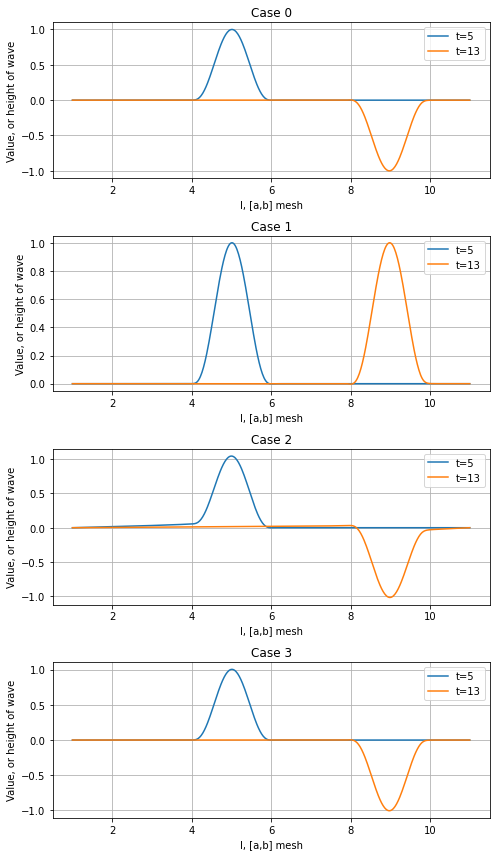

In [3]:
def plot_case( ax, pde_result, plot_fn ):
    dt = res['time'][1] - res['time'][0]
    u = lambda t: res['U'][ int(t/dt) ,:]
    
    for i in (5,13):
        ax.plot(
            res['mesh'],
            # only plot the thing we're supposed to
            plot_fn( u(i), res['mesh'] ),
            label='t={0}'.format(i),
        )
    ax.set_xlabel('I, [a,b] mesh')
    ax.set_ylabel('Value, or height of wave')
    ax.grid()
    ax.legend()
    
    
# Conditional
flick = lambda t: np.where(
    t * (2-t) > 0.0,
    (t*(2-t))**3,
    0
)


n = 1+500
dt = 0.01
x0 = 1
x1 = 11
mesh = np.linspace(x0, x1, n, endpoint=True)
u0 = 0*mesh
v0 = 0*u0


experiments = [
    (
        # Case 0
        0,
        # d, e functions
        lambda x: 1.0,
        # Boundary functions
        (
            {'type': 'dirichlet', 'f': flick },
            {'type': 'dirichlet', 'f': lambda t: 0.0 },
        ),
        # Plot functions
        lambda u,x: u
    ),
    
    (
        # Case 1
        1,
        # d, e functions
        lambda x: 1.0,
        # Boundary functions
        (
            {'type': 'dirichlet', 'f': flick },
            {'type': 'neumann', 'f': lambda t: 0.0 },
        ),
        # Plot functions
        lambda u,x: u
    ),
    
    (
        # Case 2
        2,
        # d, e functions
        lambda x: x,
        # Boundary functions
        (
            {'type': 'dirichlet', 'f': flick },
            {'type': 'dirichlet', 'f': lambda t: 0.0 },
        ),
        # Plot functions
        lambda u,x: u*x**0.5
    ),
    (
        # Case 3
        3,
        # d, e functions
        lambda x: x**2,
        # Boundary functions
        (
            {'type': 'dirichlet', 'f': flick },
            {'type': 'dirichlet', 'f': lambda t: 0.0 },
        ),
        # Plot functions
        lambda u,x: u*x
    ),
]

# plot_fn = lambda u,x: u*x**0.5


fig, axs = plt.subplots( len(experiments), figsize=(7,3*len(experiments)) )


# Run all our experiments
#  After each run, plot it to the correct axis
for i, de_func, boundaries, plot_fn in experiments:
    res = WavePDESolver(
        0, 13,
        de_func, de_func,
    ).solve(
        U0 = (u0, v0),
        mesh = mesh,
        dt = dt,
        boundaries = boundaries,
        progress=True
    )
    ax = axs if len(experiments) == 1 else axs[i]
    plot_case( ax, res, plot_fn )
    ax.set_title('Case {0}'.format(i))

fig.tight_layout()
plt.plot()
None